In [1]:
from ultralytics import YOLO

model = YOLO(model="runs/detect/train13/weights/best.pt") 


image 1/9 /Users/kartikbathla/Desktop/AIS/Intelligent Sensing/intelligent-sensing-practice-module/yolov8-pyronear/../datasets/curated_fires/images/border_fire.jpg: 384x640 (no detections), 22.3ms
image 2/9 /Users/kartikbathla/Desktop/AIS/Intelligent Sensing/intelligent-sensing-practice-module/yolov8-pyronear/../datasets/curated_fires/images/gilman_fire.jpg: 384x640 (no detections), 22.7ms
image 3/9 /Users/kartikbathla/Desktop/AIS/Intelligent Sensing/intelligent-sensing-practice-module/yolov8-pyronear/../datasets/curated_fires/images/kenneth_fire.jpg: 384x640 2 smokes, 19.7ms
image 4/9 /Users/kartikbathla/Desktop/AIS/Intelligent Sensing/intelligent-sensing-practice-module/yolov8-pyronear/../datasets/curated_fires/images/lilac_fire.jpg: 384x640 (no detections), 22.3ms
image 5/9 /Users/kartikbathla/Desktop/AIS/Intelligent Sensing/intelligent-sensing-practice-module/yolov8-pyronear/../datasets/curated_fires/images/miramar_fire_1.jpg: 384x640 (no detections), 27.2ms
image 6/9 /Users/kartik

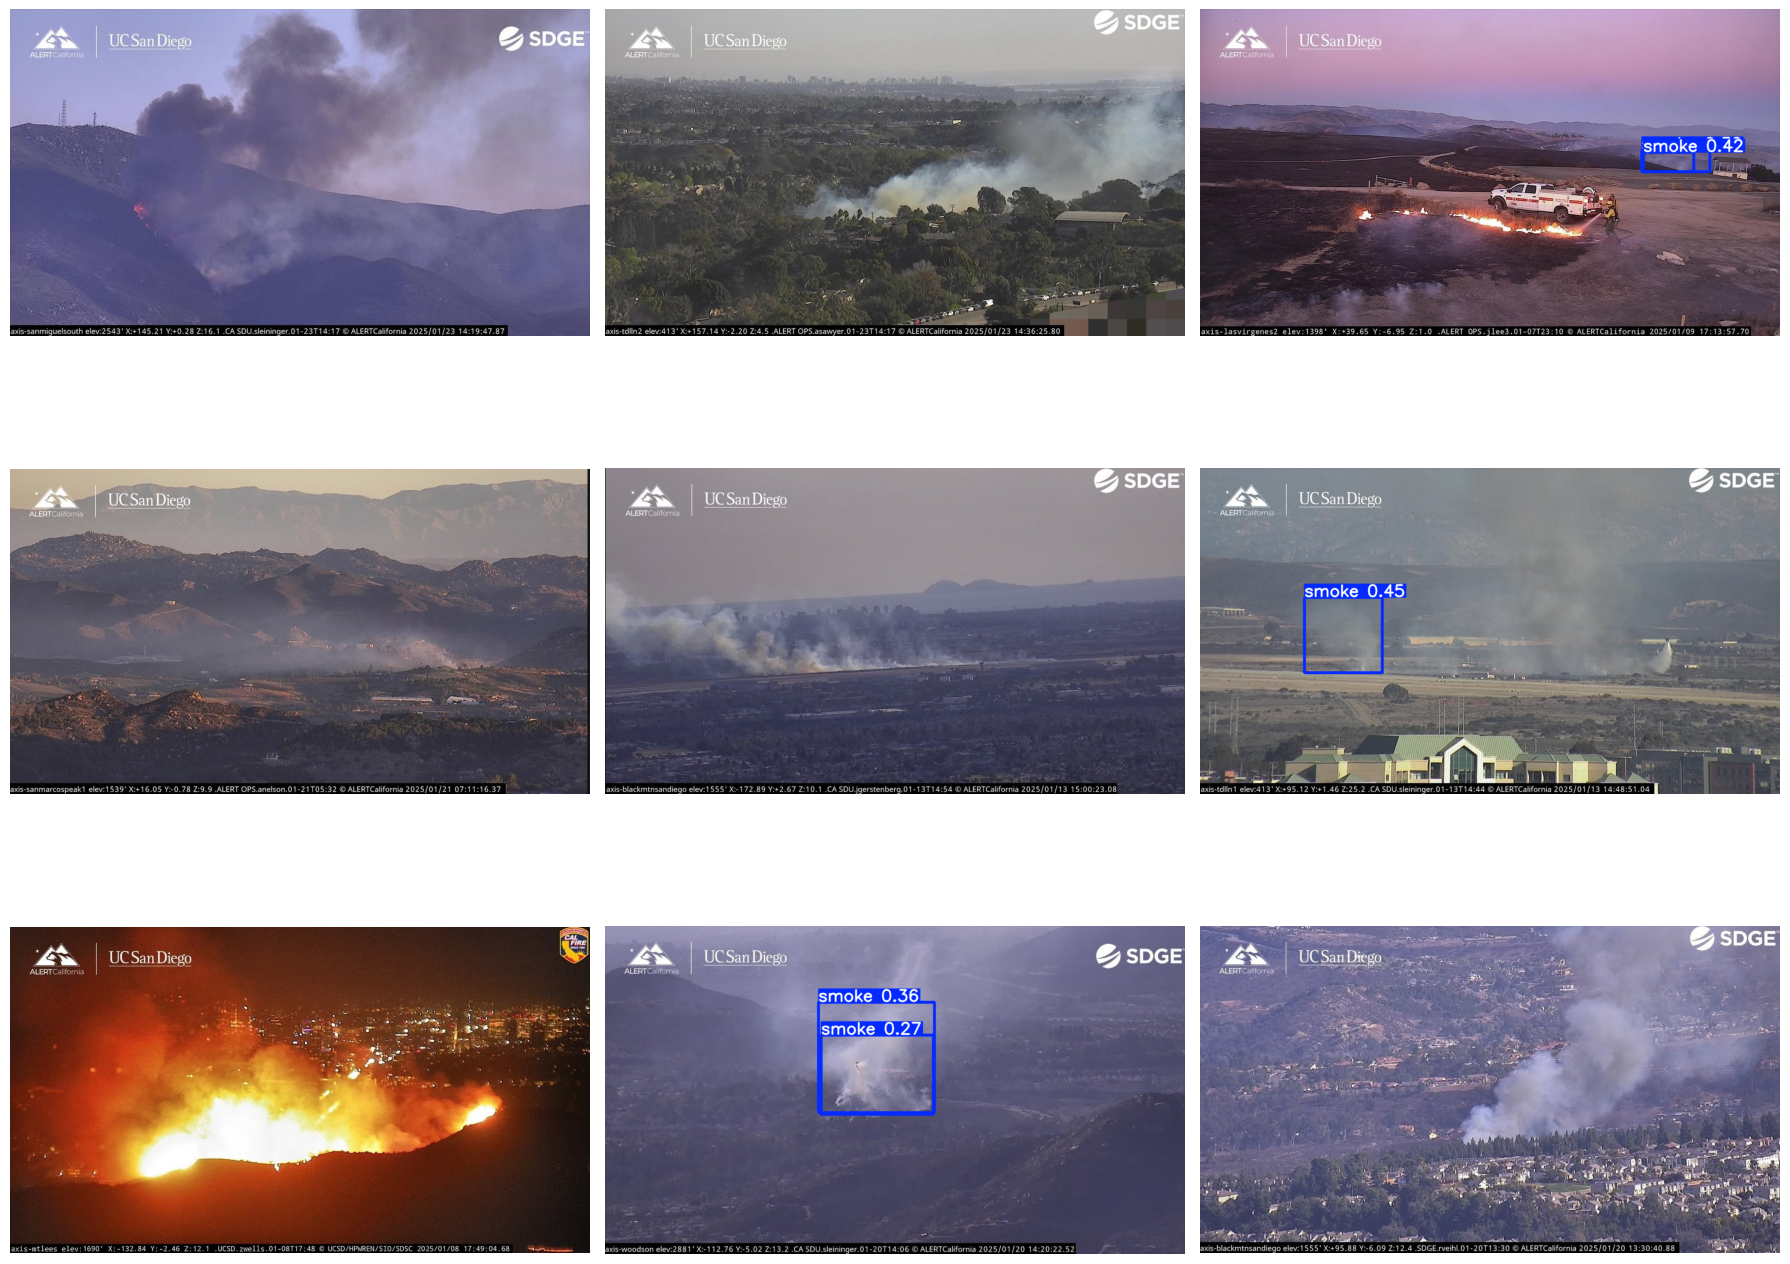

In [2]:
import matplotlib.pyplot as plt
import math

# Run prediction
results = model("../datasets/curated_fires/images")

# Determine collage grid size
num_images = len(results)
cols = 3  # you can adjust number of columns
rows = math.ceil(num_images / cols)

# Set up the figure
fig, axes = plt.subplots(rows, cols, figsize=(cols*6, rows*5))

# Flatten axes array if there are multiple rows
if rows > 1:
    axes = axes.flatten()
else:
    axes = [axes]

# Loop over results and display them
for ax, res in zip(axes, results):
    im_array = res.plot()  # returns a BGR numpy array with predictions
    ax.imshow(im_array[..., ::-1])  # convert BGR to RGB
    ax.axis('off')

# Hide any unused axes if images < axes
for ax in axes[num_images:]:
    ax.axis('off')

plt.tight_layout()
plt.show()


In [14]:
results = model("../datasets/alert_california_ss/Screenshot 2025-03-26 at 6.47.18 PM.png", conf=0.3)
results[0].show()


image 1/1 /Users/kartikbathla/Desktop/AIS/Intelligent Sensing/intelligent-sensing-practice-module/yolov8-pyronear/../datasets/alert_california_ss/Screenshot 2025-03-26 at 6.47.18 PM.png: 384x640 (no detections), 28.9ms
Speed: 1.5ms preprocess, 28.9ms inference, 0.2ms postprocess per image at shape (1, 3, 384, 640)


In [15]:
!yolo task=detect mode=predict model=runs/detect/train13/weights/best.pt source=../datasets/curated_fire_timelapses/hughes_fire.mp4 save=True


Ultralytics 8.3.70 🚀 Python-3.10.6 torch-2.6.0 CPU (Apple M3 Pro)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs

video 1/1 (frame 1/479) /Users/kartikbathla/Desktop/AIS/Intelligent Sensing/intelligent-sensing-practice-module/yolov8-pyronear/../datasets/curated_fire_timelapses/hughes_fire.mp4: 384x640 (no detections), 42.0ms
video 1/1 (frame 2/479) /Users/kartikbathla/Desktop/AIS/Intelligent Sensing/intelligent-sensing-practice-module/yolov8-pyronear/../datasets/curated_fire_timelapses/hughes_fire.mp4: 384x640 (no detections), 32.1ms
video 1/1 (frame 3/479) /Users/kartikbathla/Desktop/AIS/Intelligent Sensing/intelligent-sensing-practice-module/yolov8-pyronear/../datasets/curated_fire_timelapses/hughes_fire.mp4: 384x640 1 smoke, 32.5ms
video 1/1 (frame 4/479) /Users/kartikbathla/Desktop/AIS/Intelligent Sensing/intelligent-sensing-practice-module/yolov8-pyronear/../datasets/curated_fire_timelapses/hughes_fire.mp4: 384x640 1 smoke, 27.2ms
video 1/1 (frame

In [4]:
!yolo detect val model=runs/detect/train13/weights/best.pt data=pyro_sdis.yaml

Ultralytics 8.3.70 🚀 Python-3.10.6 torch-2.6.0 CPU (Apple M3 Pro)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /Users/kartikbathla/Desktop/AIS/Intelligent Sensing/intelligent-se
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all       4099       3942      0.671      0.667      0.686      0.417
Speed: 0.2ms preprocess, 78.7ms inference, 0.0ms loss, 0.1ms postprocess per image
Results saved to runs/detect/val2
💡 Learn more at https://docs.ultralytics.com/modes/val


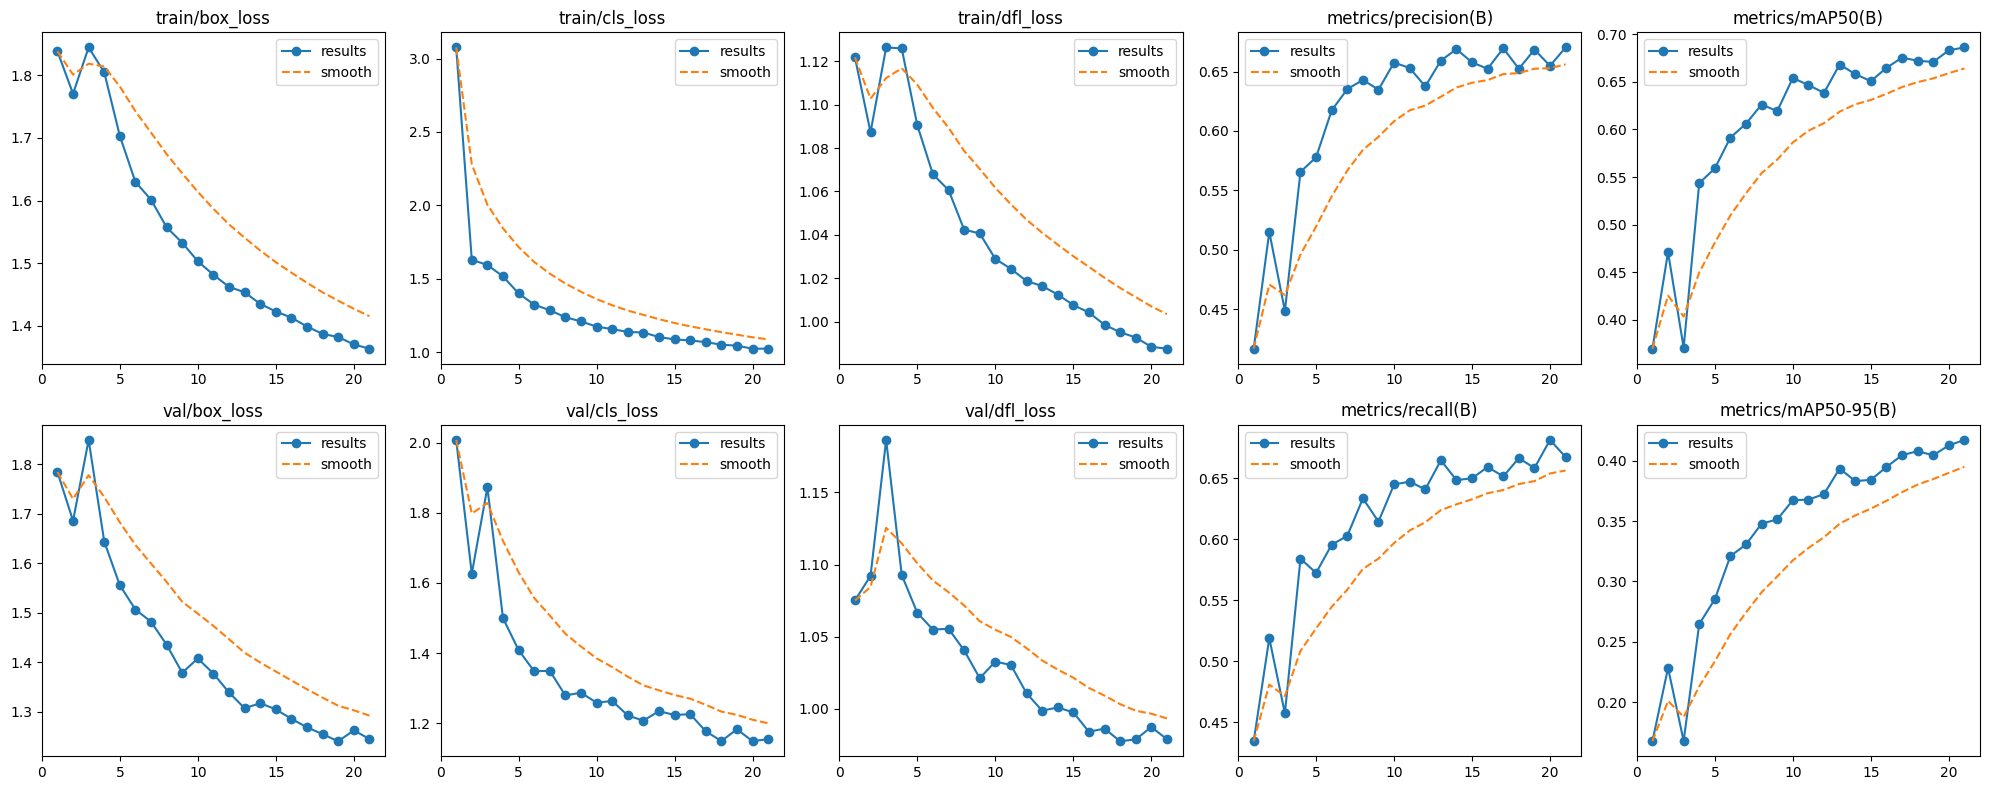

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the results.csv file
df = pd.read_csv('runs/detect/train13/results.csv')

# Define plots layout
metrics = [
    ('train/box_loss', 'val/box_loss'),
    ('train/cls_loss', 'val/cls_loss'),
    ('train/dfl_loss', 'val/dfl_loss'),
    ('metrics/precision(B)', 'metrics/recall(B)'),
    ('metrics/mAP50(B)', 'metrics/mAP50-95(B)')
]

fig, axes = plt.subplots(2, 5, figsize=(20, 8))

# Plot each metric
for idx, (train_metric, val_metric) in enumerate(metrics):
    # Training metric plot
    axes[0, idx].plot(df['epoch'], df[train_metric], '-o', label='results')
    axes[0, idx].plot(df['epoch'], df[train_metric].ewm(span=10).mean(), '--', label='smooth')
    axes[0, idx].set_title(train_metric)
    axes[0, idx].legend()

    # Validation metric plot
    axes[1, idx].plot(df['epoch'], df[val_metric], '-o', label='results')
    axes[1, idx].plot(df['epoch'], df[val_metric].ewm(span=10).mean(), '--', label='smooth')
    axes[1, idx].set_title(val_metric)
    axes[1, idx].legend()

plt.tight_layout()
plt.show()
